# Análisis Exploratorio de Datos (EDA)

Este notebook realiza un **EDA completo** sobre el dataset de velocidades medias de descarga por provincia argentina, desde 2014 hasta 2025.

Incluye:
- Carga y limpieza de datos
- Análisis descriptivo
- Visualizaciones (histogramas, boxplots, tendencias)
- Insights clave


In [9]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# Cargar el archivo CSV
file_path = 'Internet Velocidad Media de Descarga Provincias.csv'
df = pd.read_csv(file_path)

# Mostrar primeras filas
df.head()


,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2025,1,Buenos Aires,"274,51"
1,2025,1,CABA,"319,34"
2,2025,1,Catamarca,"120,65"
3,2025,1,Chaco,"119,48"
4,2025,1,Chubut,"106,19"


## Limpieza de datos

- Convertir separador decimal de coma a punto
- Cambiar tipo de dato de la columna de velocidad a numérico
- Verificar valores nulos


In [10]:

# Renombrar columna para facilidad
df.rename(columns={'Mbps (Media de bajada)': 'Mbps'}, inplace=True)

# Reemplazar coma por punto y convertir a float
df['Mbps'] = df['Mbps'].str.replace(',', '.').astype(float)

# Verificar tipos y nulos
print(df.info())
print("Valores nulos por columna:", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        1080 non-null   int64  
 1   Trimestre  1080 non-null   int64  
 2   Provincia  1080 non-null   object 
 3   Mbps       1080 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 33.9+ KB
None
Valores nulos por columna: Año          0
Trimestre    0
Provincia    0
Mbps         0
dtype: int64


## Análisis descriptivo

- Estadísticas básicas
- Distribución por año y provincia


In [11]:

# Estadísticas generales
describe = df.describe()
print(describe)

# Velocidad promedio por año
print(df.groupby('Año')['Mbps'].mean())


               Año    Trimestre         Mbps
count  1080.000000  1080.000000  1080.000000
mean   2019.133333     2.466667    30.911093
std       3.251121     1.127958    42.944432
min    2014.000000     1.000000     2.570000
25%    2016.000000     1.000000     5.057500
50%    2019.000000     2.000000    11.655000
75%    2022.000000     3.000000    37.732500
max    2025.000000     4.000000   319.340000
Año
2014      3.399792
2015      4.125938
2016      4.787083
2017      6.325521
2018      9.741250
2019     14.012708
2020     22.261771
2021     28.680625
2022     45.041667
2023     77.780208
2024     97.186979
2025    137.625000
Name: Mbps, dtype: float64


## Visualizaciones

- Histograma de velocidades
- Boxplot por provincia
- Tendencia temporal
- Heatmap de correlación


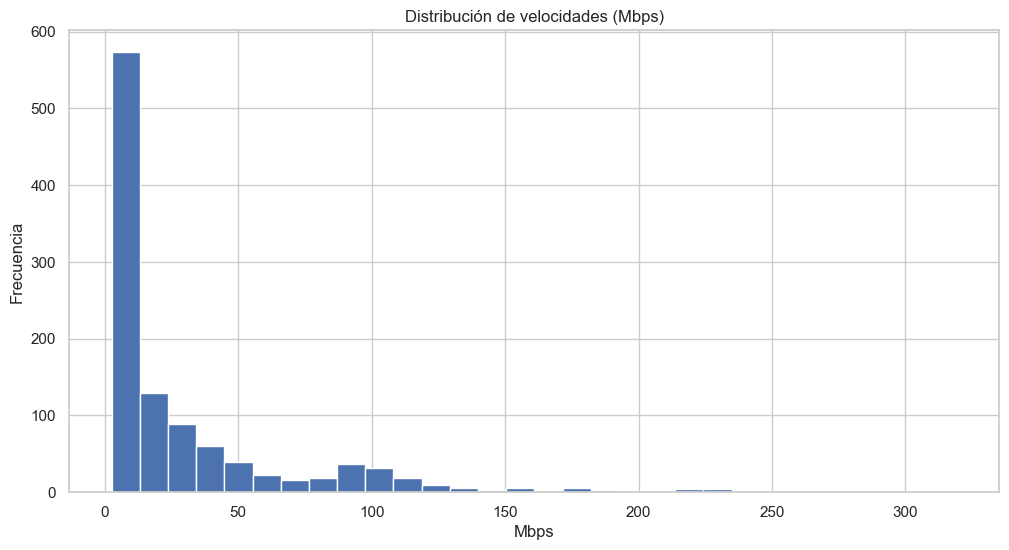

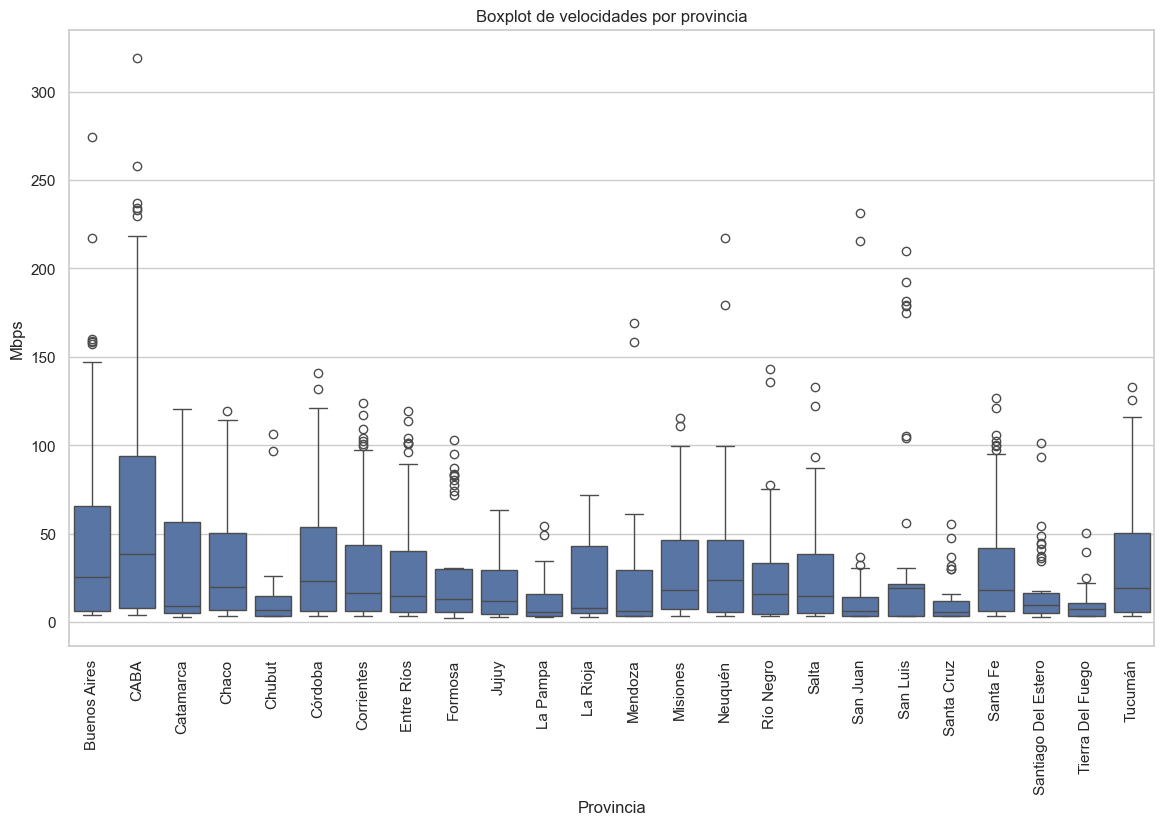

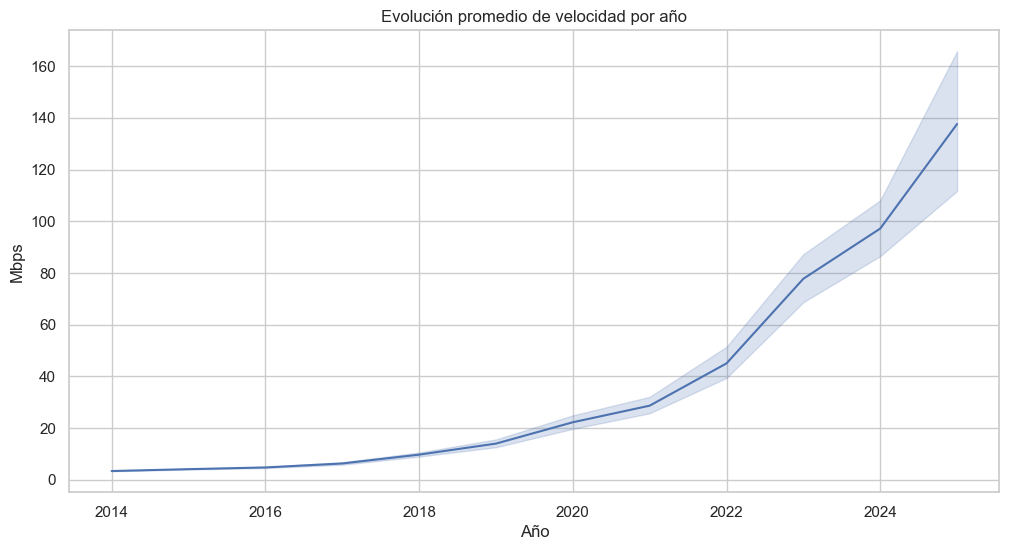

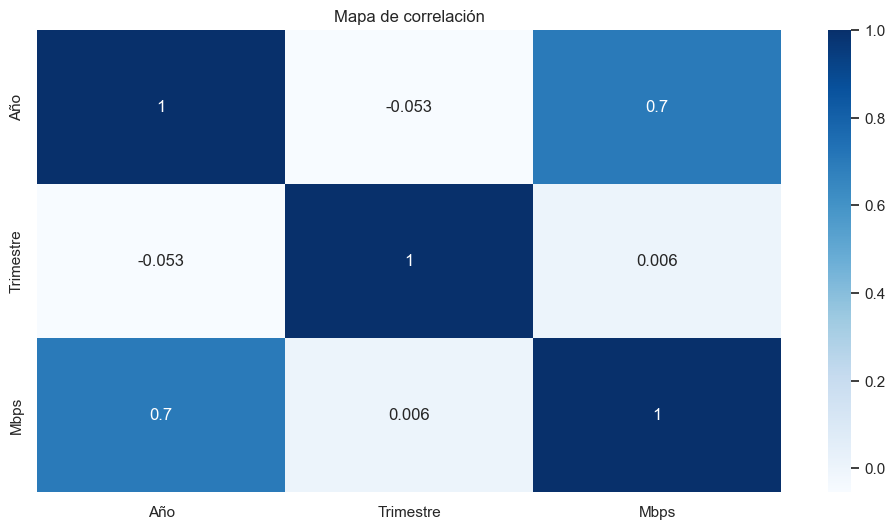

In [12]:

# Histograma
df['Mbps'].hist(bins=30)
plt.title('Distribución de velocidades (Mbps)')
plt.xlabel('Mbps')
plt.ylabel('Frecuencia')
plt.show()

# Boxplot por provincia
plt.figure(figsize=(14,8))
sns.boxplot(x='Provincia', y='Mbps', data=df)
plt.xticks(rotation=90)
plt.title('Boxplot de velocidades por provincia')
plt.show()

# Tendencia temporal
plt.figure(figsize=(12,6))
sns.lineplot(x='Año', y='Mbps', data=df, estimator='mean')
plt.title('Evolución promedio de velocidad por año')
plt.show()

# Heatmap de correlación
corr = df[['Año','Trimestre','Mbps']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Mapa de correlación')
plt.show()


## Insights clave

- ¿Qué provincias tienen mayor velocidad promedio?
- ¿Cómo ha evolucionado la velocidad en la última década?


In [13]:

# Ranking de provincias por velocidad promedio
ranking = df.groupby('Provincia')['Mbps'].mean().sort_values(ascending=False)
print(ranking)


Provincia
CABA                   77.208889
Buenos Aires           55.548444
Córdoba                41.485111
Neuquén                39.968000
San Luis               39.961556
Tucumán                38.670667
Chaco                  38.372444
Catamarca              35.318444
Santa Fe               35.193778
Corrientes             35.165556
Misiones               34.226889
Entre Ríos             33.285556
Salta                  31.542444
Río Negro              29.172222
Formosa                28.060889
La Rioja               23.984444
Mendoza                22.510444
Jujuy                  20.022667
San Juan               19.013333
Santiago Del Estero    17.858444
Chubut                 12.738222
La Pampa               11.745111
Santa Cruz             10.805333
Tierra Del Fuego       10.007333
Name: Mbps, dtype: float64
